In [24]:
import pandas as pd
import numpy as np
from loaders import *

Changes made:
1. Switched MAC from being Imac to Fmac becuase of error message about "cannot find energy estimator"
2. Created 1 glb instead of 2, one for psum (expected depth: 1920) and one iacts (expected depth: 1536).
3. Chnaged the spatial architecture for the PE cluster from 3x4 to 4x4

In [25]:
print("run_timeloop_model: ", run_timeloop_model)
out = run_timeloop_model(
    # constraints='part6/constraints_global.yaml',
    problem='L07_problem.yaml',
    mapping='L07_mapping.yaml',
    sparse_optimizations='L07_sparse_opt.yaml', 
    density_weights=1.0, 
    density_inputs=1.0
)
stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
print(stats)


run_timeloop_model:  <function run_timeloop_model at 0xffff68092ef0>
[INFO] 2025-04-12 22:31:47,989 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 256 (32*8)
    Compute energy        : 15.57 pJ

    STATS
    -----
    Utilized instances (max)     : 256
    Utilized instances (average) : 256
    Cycles                       : 16384
    Algorithmic Computes (total) : 4194304
    Actual Computes (total)      : 4194304
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 65324607.08 pJ
    Area (total)                 : 768450.56 um^2


Level 1
-------
=== reg ===

    SPECS
    -----
        Technology                      : SRAM
        Data storage size               : 1
        Data word bits                  : 8
        Data block size                 : 1
        Metadata storage width(bits)    : 4
        Metadata storage depth          : 1
        Cluster size                    : 1
        Instances        

In [3]:
# !timeloop model ./output_dir/parsed-processed-input.yaml

In [26]:
import numpy as np


density_vals = np.linspace(0.2, 1, 5)
metric_names = [
    "Computes per Cycle",
    "Compute Utilization",
    "fJ per Algorithmic Compute",
    "fJ per Compute"
]

heatmaps = {name: np.zeros((len(density_vals), len(density_vals))) for name in metric_names}

for i, density_weights in enumerate(density_vals): 
    for j, density_inputs in enumerate(density_vals): 
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml', 
            density_weights=density_weights, 
            density_inputs=density_inputs
        )

        computes_per_cycle = out.computes / out.cycles
        compute_utilization = out.percent_utilization
    
        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        fj_algo, fj_compute = None, None
        found_algo, found_compute = False, False
        for line in stats.split('\n'):
            if 'fJ/Algorithmic-Compute' in line:
                found_algo = True
            if 'fJ/Compute' in line:
                found_compute = True
            if found_algo and 'Total' in line and fj_algo is None:
                fj_algo = float(line.split('=')[-1].strip())
            if found_compute and 'Total' in line and fj_compute is None:
                fj_compute = float(line.split('=')[-1].strip())

    
        print(f'Density Weights: {density_weights}, Density Inputs: {density_inputs}')
        print(f'Compute Utilization: {compute_utilization}, Computes/Cycle: {computes_per_cycle}, fJ/Algorithmic-Compute: {fj_algo}, fJ/Compute: {fj_compute}')

        heatmaps["Computes per Cycle"][i, j] = computes_per_cycle
        heatmaps["Compute Utilization"][i, j] = compute_utilization
        heatmaps["fJ per Algorithmic Compute"][i, j] = fj_algo
        heatmaps["fJ per Compute"][i, j] = fj_compute


[INFO] 2025-04-12 22:32:10,625 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.2
Compute Utilization: 99.9, Computes/Cycle: 6393.756097560976, fJ/Algorithmic-Compute: 18920.53, fJ/Compute: 473010.91
[INFO] 2025-04-12 22:32:13,737 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.4
Compute Utilization: 99.98, Computes/Cycle: 3199.316552250191, fJ/Algorithmic-Compute: 22529.38, fJ/Compute: 281616.67
[INFO] 2025-04-12 22:32:16,904 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.6000000000000001
Compute Utilization: 99.95, Computes/Cycle: 2132.3355363497712, fJ/Algorithmic-Compute: 26138.27, fJ/Compute: 217818.71
[INFO] 2025-04-12 22:32:20,038 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.8
Compute Utilization: 99.98, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 29747.12, fJ/Compute: 185919.42
[INFO] 2025-04-12 22:32:23,164 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 1.0
Compute Utilization: 99.99, Computes/Cycle: 1279.9218797680805, fJ/Algorithmic-Compute: 33355.86, fJ/Compute: 166779.25
[INFO] 2025-04-12 22:32:26,270 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.2
Compute Utilization: 99.98, Computes/Cycle: 3199.316552250191, fJ/Algorithmic-Compute: 18973.58, fJ/Compute: 237169.29
[INFO] 2025-04-12 22:32:29,425 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.4
Compute Utilization: 99.98, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 22622.92, fJ/Compute: 141393.18
[INFO] 2025-04-12 22:32:32,555 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.6000000000000001
Compute Utilization: 99.98, Computes/Cycle: 1066.4388507500635, fJ/Algorithmic-Compute: 26272.26, fJ/Compute: 109467.65
[INFO] 2025-04-12 22:32:35,666 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.8
Compute Utilization: 100.0, Computes/Cycle: 799.9816898722106, fJ/Algorithmic-Compute: 29921.59, fJ/Compute: 93504.9
[INFO] 2025-04-12 22:32:38,795 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 1.0
Compute Utilization: 99.99, Computes/Cycle: 639.9609398840403, fJ/Algorithmic-Compute: 33570.79, fJ/Compute: 83926.96
[INFO] 2025-04-12 22:32:41,914 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.2
Compute Utilization: 99.95, Computes/Cycle: 2132.3355363497712, fJ/Algorithmic-Compute: 19026.8, fJ/Compute: 158556.5
[INFO] 2025-04-12 22:32:45,096 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.4
Compute Utilization: 99.98, Computes/Cycle: 1066.4388507500635, fJ/Algorithmic-Compute: 22716.59, fJ/Compute: 94652.38
[INFO] 2025-04-12 22:32:48,233 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.6000000000000001
Compute Utilization: 99.99, Computes/Cycle: 711.0194948296321, fJ/Algorithmic-Compute: 26406.39, fJ/Compute: 73351.06
[INFO] 2025-04-12 22:32:51,374 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.8
Compute Utilization: 99.99, Computes/Cycle: 533.2872218690401, fJ/Algorithmic-Compute: 30096.21, fJ/Compute: 62700.39
[INFO] 2025-04-12 22:32:54,484 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 1.0
Compute Utilization: 99.99, Computes/Cycle: 426.6406265893602, fJ/Algorithmic-Compute: 33785.86, fJ/Compute: 56309.76
[INFO] 2025-04-12 22:32:57,659 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.2
Compute Utilization: 99.98, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 19079.86, fJ/Compute: 119249.06
[INFO] 2025-04-12 22:33:00,802 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.4
Compute Utilization: 100.0, Computes/Cycle: 799.9816898722106, fJ/Algorithmic-Compute: 22810.13, fJ/Compute: 71281.6
[INFO] 2025-04-12 22:33:03,928 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.6000000000000001
Compute Utilization: 99.99, Computes/Cycle: 533.2872218690401, fJ/Algorithmic-Compute: 26540.41, fJ/Compute: 55292.5
[INFO] 2025-04-12 22:33:07,040 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.8
Compute Utilization: 100.0, Computes/Cycle: 399.9908449361053, fJ/Algorithmic-Compute: 30270.68, fJ/Compute: 47297.92
[INFO] 2025-04-12 22:33:10,174 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 1.0
Compute Utilization: 99.99, Computes/Cycle: 319.98046994202014, fJ/Algorithmic-Compute: 34000.81, fJ/Compute: 42501.0
[INFO] 2025-04-12 22:33:13,344 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.2
Compute Utilization: 99.99, Computes/Cycle: 1279.9218797680805, fJ/Algorithmic-Compute: 19132.93, fJ/Compute: 95664.65
[INFO] 2025-04-12 22:33:16,481 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.4
Compute Utilization: 99.99, Computes/Cycle: 639.9609398840403, fJ/Algorithmic-Compute: 22903.68, fJ/Compute: 57259.18
[INFO] 2025-04-12 22:33:19,609 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.6000000000000001
Compute Utilization: 99.99, Computes/Cycle: 426.6406265893602, fJ/Algorithmic-Compute: 26674.42, fJ/Compute: 44457.36
[INFO] 2025-04-12 22:33:22,755 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.8
Compute Utilization: 99.99, Computes/Cycle: 319.98046994202014, fJ/Algorithmic-Compute: 30445.17, fJ/Compute: 38056.45
[INFO] 2025-04-12 22:33:25,933 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 1.0
Compute Utilization: 100.0, Computes/Cycle: 256.0, fJ/Algorithmic-Compute: 34215.75, fJ/Compute: 34215.75


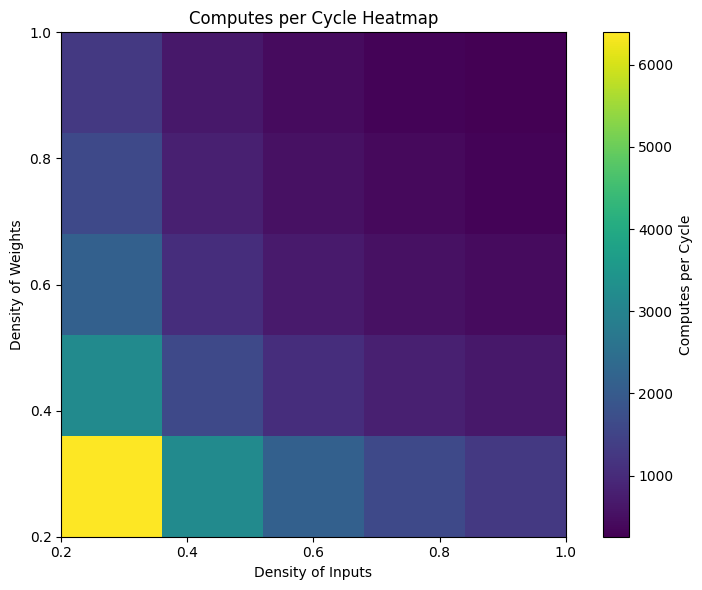

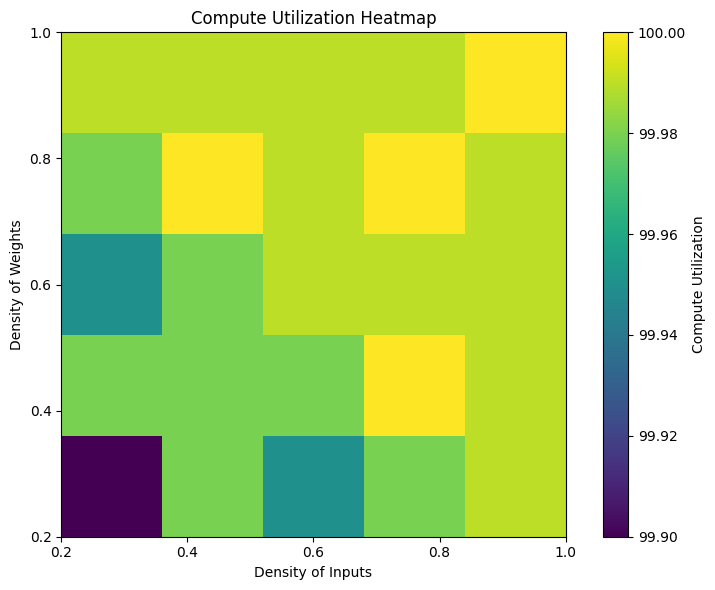

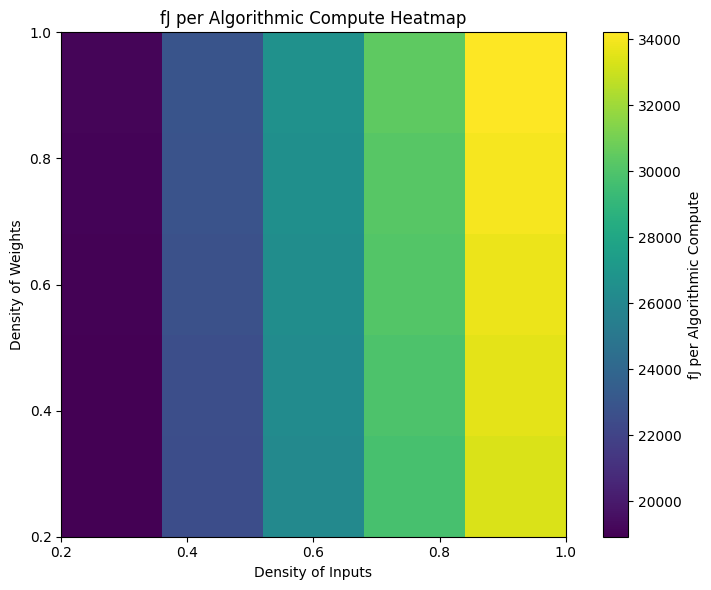

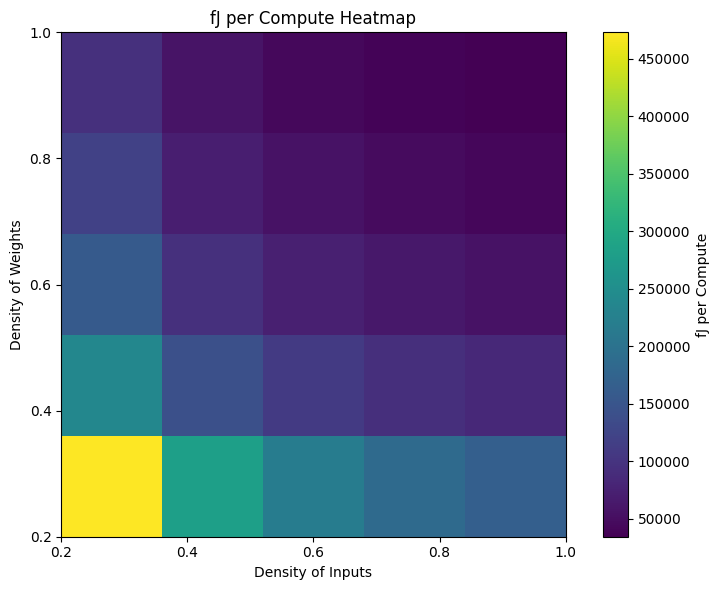

In [27]:
import matplotlib.pyplot as plt

for metric, heatmap in heatmaps.items():
    plt.figure(figsize=(8, 6))
    im = plt.imshow(heatmap, origin='lower', cmap='viridis',
                    extent=[density_vals[0], density_vals[-1], density_vals[0], density_vals[-1]])
    plt.colorbar(im, label=metric)
    plt.xlabel('Density of Inputs')
    plt.ylabel('Density of Weights')
    plt.title(f'{metric} Heatmap')
    plt.xticks(density_vals)
    plt.yticks(density_vals)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

[INFO] 2025-04-14 01:04:34,831 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:37,913 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:41,125 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:44,264 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:47,389 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:50,501 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:53,609 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:56,706 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:04:59,858 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:02,975 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:06,109 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:09,331 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:12,500 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:15,645 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:18,813 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:21,946 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:25,082 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:28,211 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:31,354 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:34,483 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:37,668 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:40,817 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:43,943 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:47,094 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:05:50,232 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


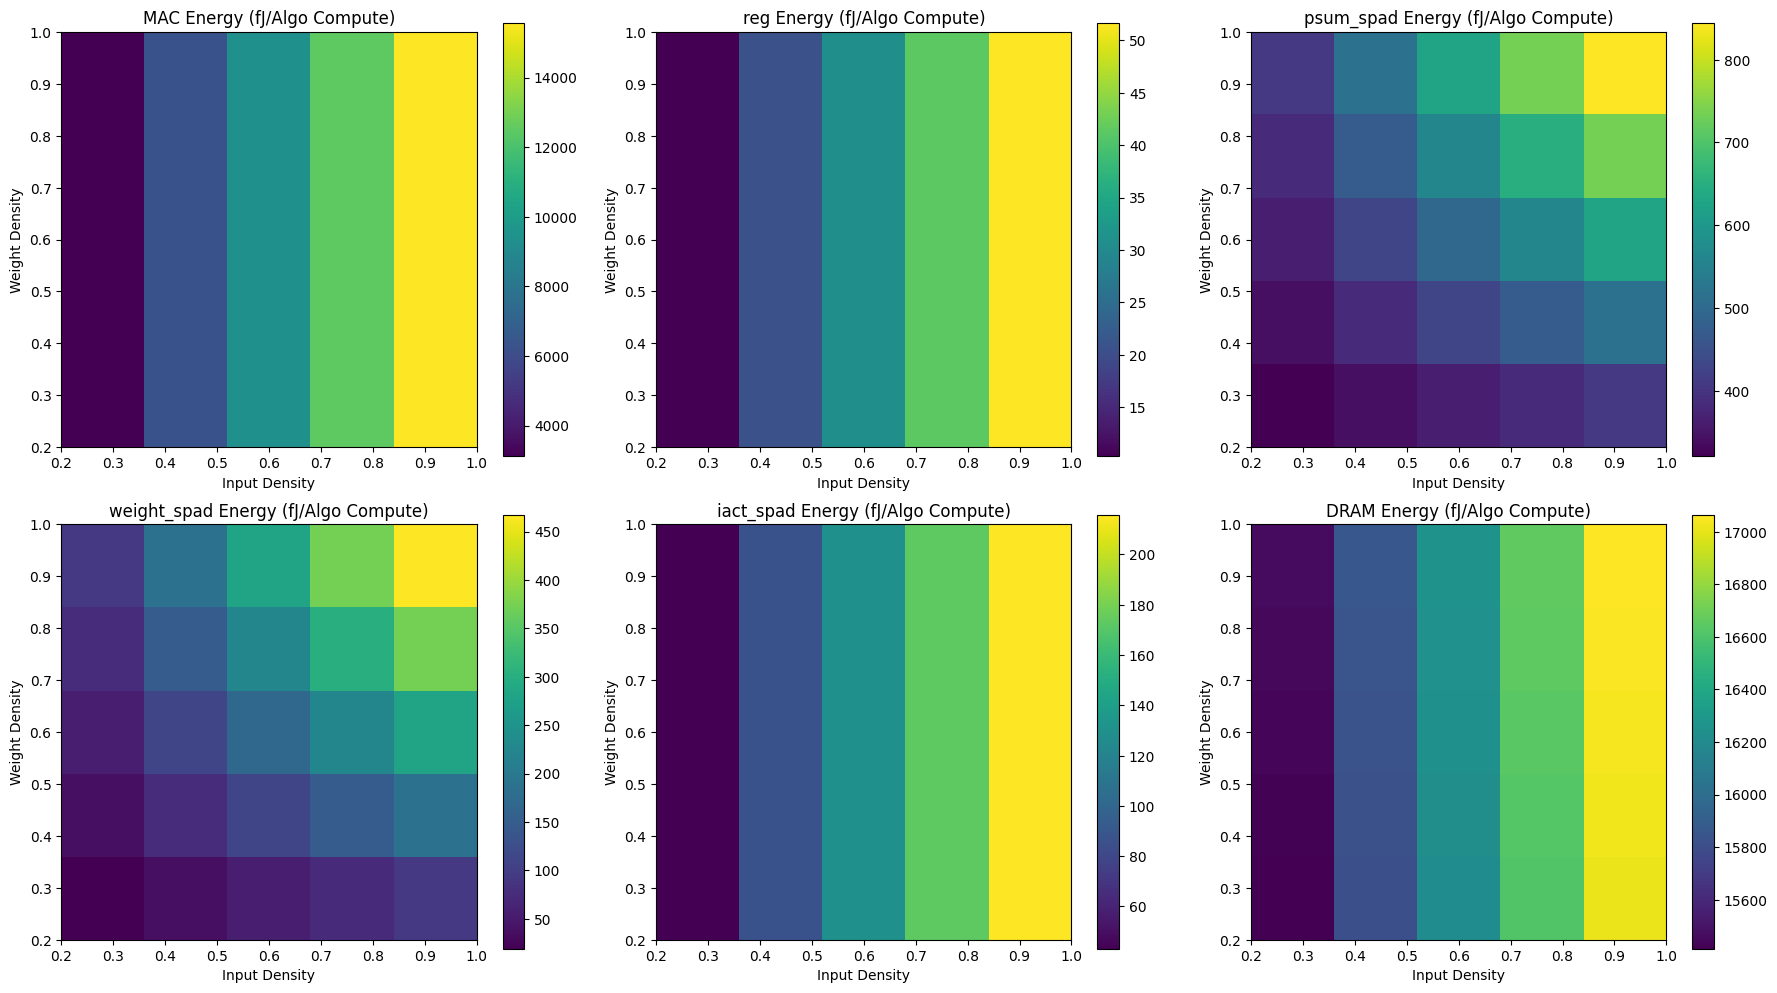

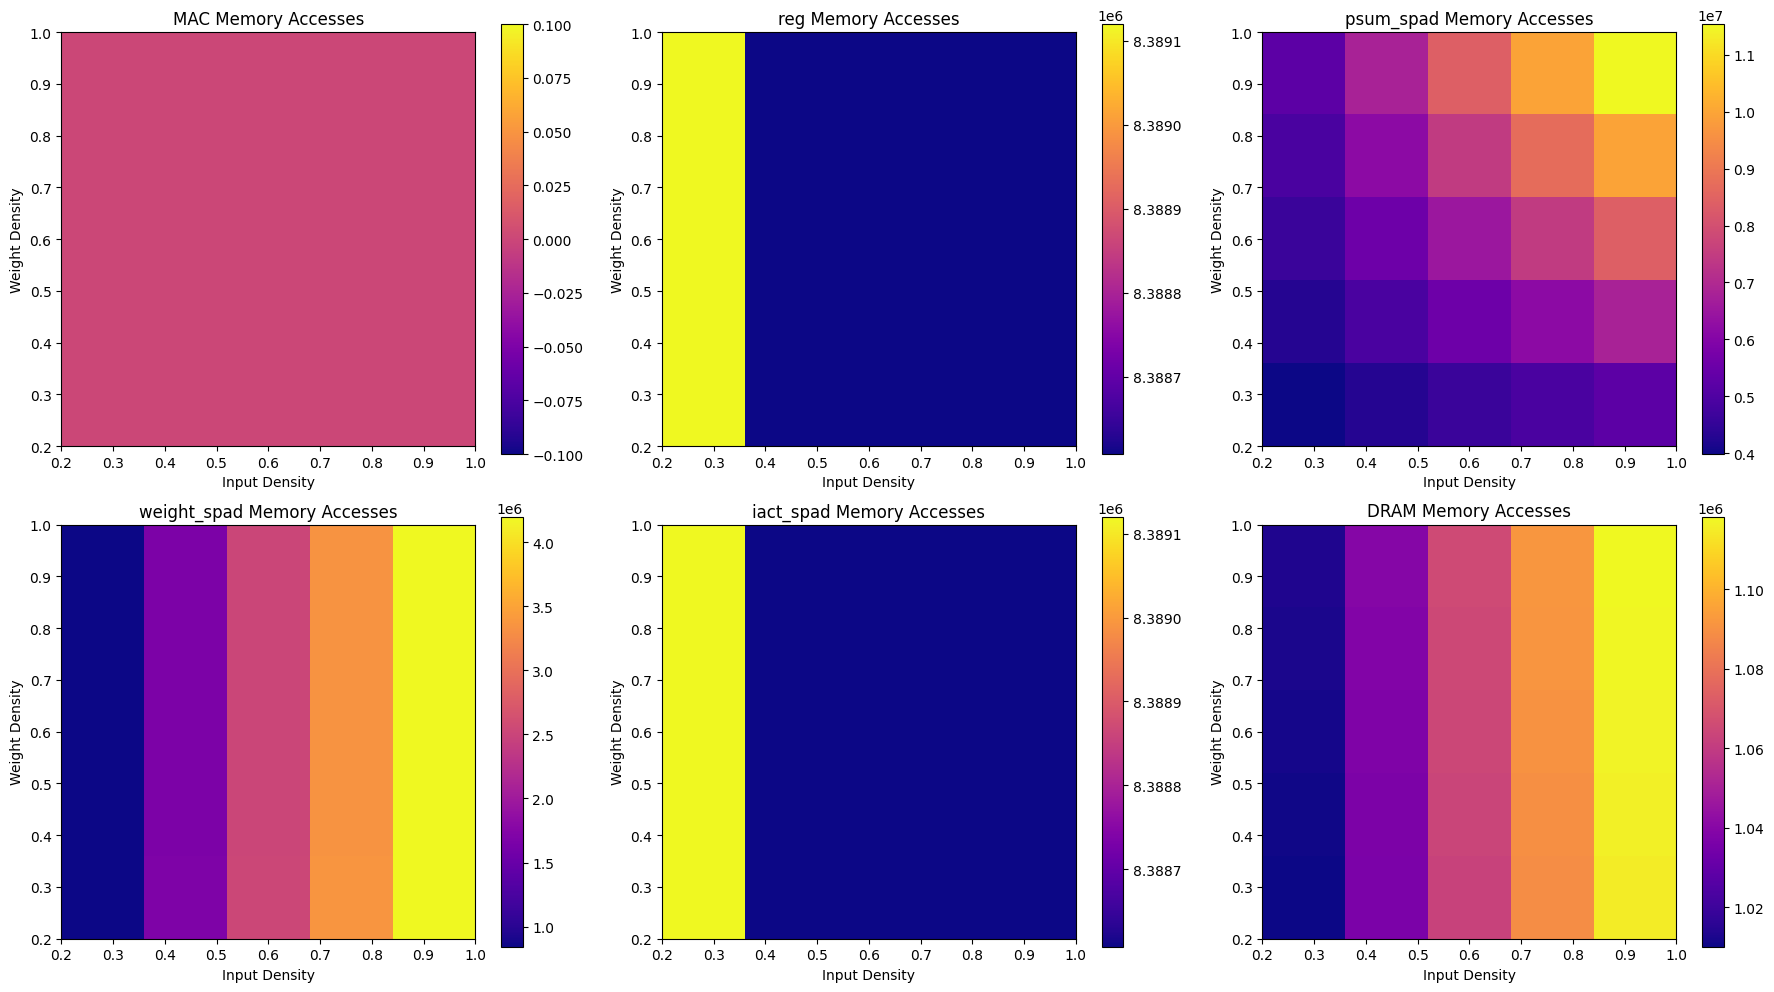

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import re

density_vals = np.linspace(0.2, 1.0, 5)
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']
energy_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
memory_access_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}

def extract_energy_and_traffic(stats):
    energies = {}
    accesses = {comp: 0 for comp in components}
    lines = stats.split('\n')
    
    # --- Energy ---
    in_energy_section = False
    for line in lines:
        if "fJ/Algorithmic-Compute" in line:
            in_energy_section = True
            continue
        if in_energy_section:
            if line.strip() == "":
                break
            parts = line.split('=')
            if len(parts) == 2:
                key = parts[0].strip().split()[0]
                val = float(parts[1].strip())
                energies[key] = val

    # --- Memory Accesses ---
    current_comp = None
    instances = 1
    for line in lines:
        if line.strip().startswith("==="):
            match = re.match(r"=== (\w+) ===", line.strip())
            if match and match.group(1) in components:
                current_comp = match.group(1)
                instances = 1  # reset
        elif current_comp:
            if "Instances" in line and "(" in line:
                instances = int(re.search(r"(\d+)", line).group(1))
            elif any(k in line for k in ["Actual scalar reads", "Actual scalar fills", "Actual scalar updates"]):
                try:
                    val = int(line.split(':')[-1].strip().split()[0])
                    accesses[current_comp] += val * instances
                except:
                    pass

    return energies, accesses


# Run experiments across densities
for i, density_weights in enumerate(density_vals):
    for j, density_inputs in enumerate(density_vals):
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml',
            density_weights=density_weights,
            density_inputs=density_inputs
        )

        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        energies, accesses = extract_energy_and_traffic(stats)

        for comp in components:
            energy_breakdown[comp][i, j] = energies.get(comp, 0)
            memory_access_breakdown[comp][i, j] = accesses.get(comp, 0)

# Plot energy heatmaps
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(energy_breakdown[comp], origin='lower', cmap='viridis', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Energy (fJ/Algo Compute)')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# Plot memory accesses
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(memory_access_breakdown[comp], origin='lower', cmap='plasma', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Memory Accesses')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


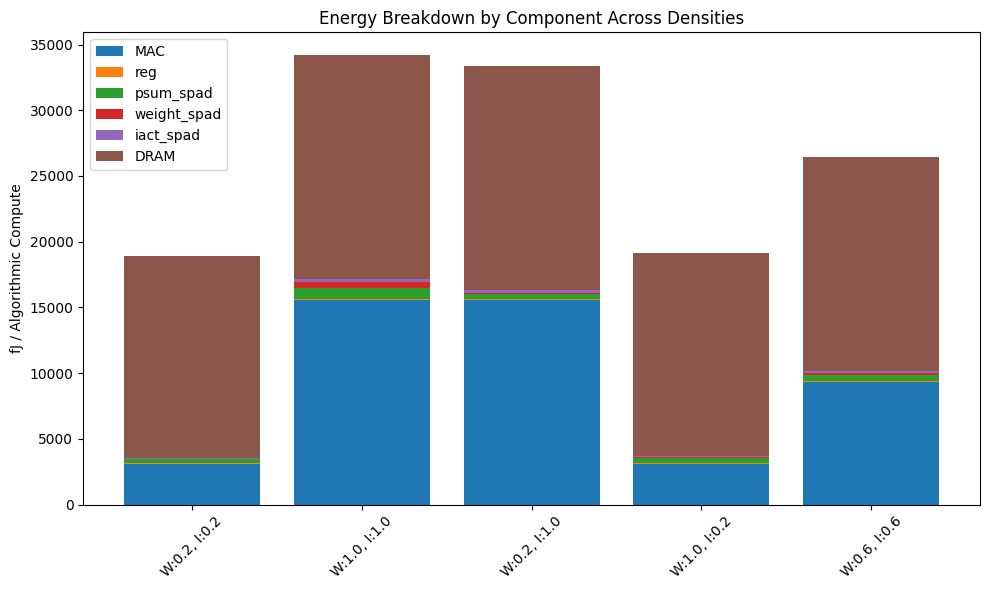

In [34]:
# Pick representative points: low/low, high/high, low/high, high/low, mid/mid
sample_indices = [(0, 0), (4, 4), (0, 4), (4, 0), (2, 2)]
labels = [f"W:{density_vals[i]:.1f}, I:{density_vals[j]:.1f}" for (i, j) in sample_indices]

# Stack component energy contributions
component_colors = {
    'MAC': 'tab:blue',
    'reg': 'tab:orange',
    'psum_spad': 'tab:green',
    'weight_spad': 'tab:red',
    'iact_spad': 'tab:purple',
    'DRAM': 'tab:brown'
}

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(sample_indices))

for comp in components:
    vals = [energy_breakdown[comp][i, j] for (i, j) in sample_indices]
    ax.bar(labels, vals, bottom=bottom, label=comp, color=component_colors[comp])
    bottom += np.array(vals)

ax.set_ylabel("fJ / Algorithmic Compute")
ax.set_title("Energy Breakdown by Component Across Densities")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

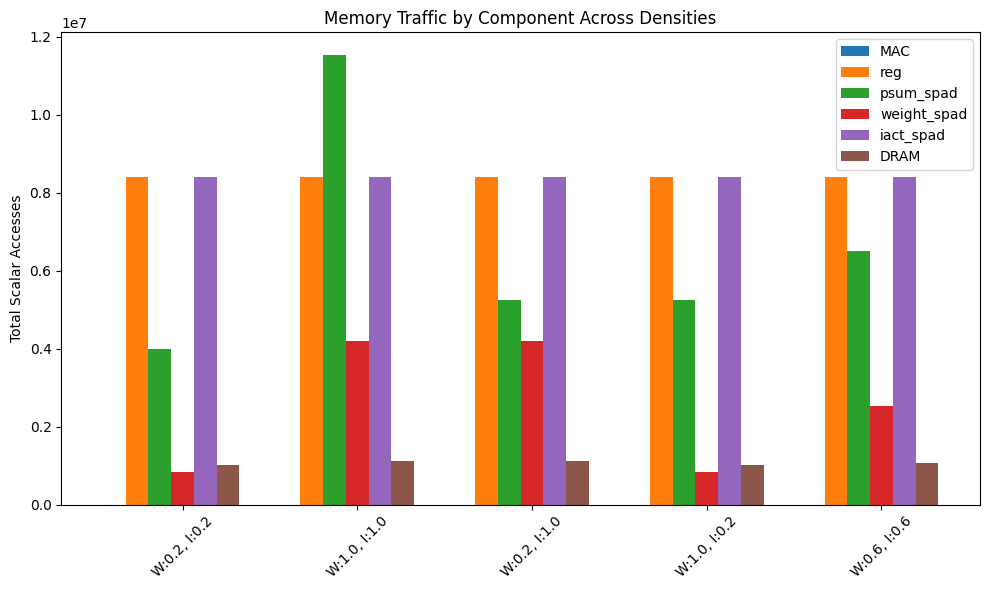

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(sample_indices))  # label locations
width = 0.13  # bar width

for idx, comp in enumerate(components):
    offsets = x + (idx - len(components)/2) * width
    vals = [memory_access_breakdown[comp][i, j] for (i, j) in sample_indices]
    ax.bar(offsets, vals, width, label=comp, color=component_colors[comp])

ax.set_ylabel("Total Scalar Accesses")
ax.set_title("Memory Traffic by Component Across Densities")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

In [45]:
# Pick fixed points for slicing
fixed_w_idx = -1  # highest weight density 
fixed_i_idx = -1  # highest input density 

def plot_line(y_data, ylabel, title):
    x = density_vals
    plt.figure(figsize=(8, 5))
    for label, y in y_data.items():
        plt.plot(x, y, marker='o', label=label)
    plt.xlabel("Density")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [47]:
density_vals = np.linspace(0.2, 1.0, 5)
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']
energy_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
memory_access_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
compute_utilization = np.zeros((len(density_vals), len(density_vals)))
computes_per_cycle = np.zeros((len(density_vals), len(density_vals)))

os.makedirs("figures", exist_ok=True)
os.makedirs("arrays", exist_ok=True)

def extract_energy_and_traffic(stats):
    energies = {}
    accesses = {comp: 0 for comp in components}
    lines = stats.split('\n')
    
    in_energy_section = False
    for line in lines:
        if "fJ/Algorithmic-Compute" in line:
            in_energy_section = True
            continue
        if in_energy_section:
            if line.strip() == "":
                break
            parts = line.split('=')
            if len(parts) == 2:
                key = parts[0].strip().split()[0]
                val = float(parts[1].strip())
                energies[key] = val

    current_comp = None
    instances = 1
    for line in lines:
        if line.strip().startswith("==="):
            match = re.match(r"=== (\w+) ===", line.strip())
            if match and match.group(1) in components:
                current_comp = match.group(1)
                instances = 1
        elif current_comp:
            if "Instances" in line and "(" in line:
                instances = int(re.search(r"(\d+)", line).group(1))
            elif any(k in line for k in ["Actual scalar reads", "Actual scalar fills", "Actual scalar updates"]):
                try:
                    val = int(line.split(':')[-1].strip().split()[0])
                    accesses[current_comp] += val * instances
                except:
                    pass

    return energies, accesses

# Run experiments across densities
for i, density_weights in enumerate(density_vals):
    for j, density_inputs in enumerate(density_vals):
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml',
            density_weights=density_weights,
            density_inputs=density_inputs
        )

        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        energies, accesses = extract_energy_and_traffic(stats)

        for comp in components:
            energy_breakdown[comp][i, j] = energies.get(comp, 0)
            memory_access_breakdown[comp][i, j] = accesses.get(comp, 0)

        computes_per_cycle[i, j] = out.computes / out.cycles
        compute_utilization[i, j] = out.percent_utilization


[INFO] 2025-04-14 01:15:47,734 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:15:50,844 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:15:53,940 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:15:57,100 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:00,261 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:03,468 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:06,640 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:09,784 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:12,974 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:16,137 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:19,610 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:22,977 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:26,258 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:29,461 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:32,656 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:35,870 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:39,081 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:42,316 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:45,543 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:48,715 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:51,972 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:55,148 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:16:58,337 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:17:01,554 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 01:17:04,793 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


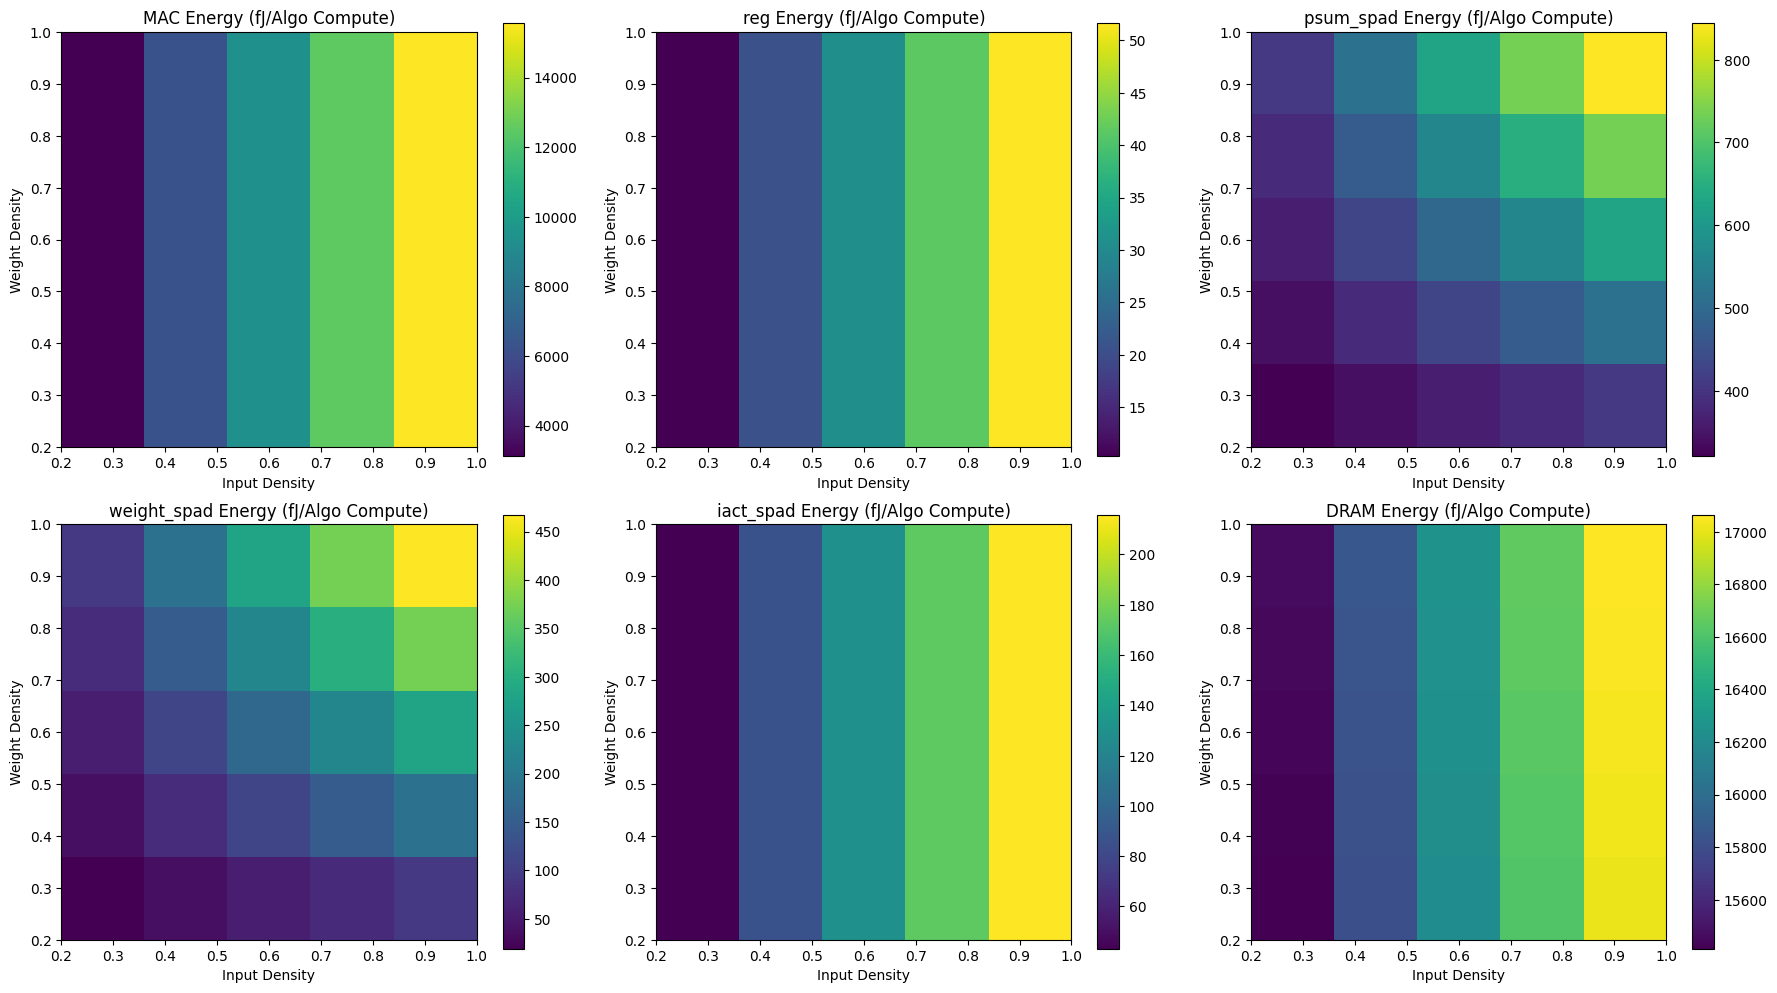

In [54]:
# Plot energy heatmaps
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(energy_breakdown[comp], origin='lower', cmap='viridis', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Energy (fJ/Algo Compute)')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
fig.tight_layout()
fig.savefig("figures/energy_heatmaps.png")
plt.show()
plt.close(fig)

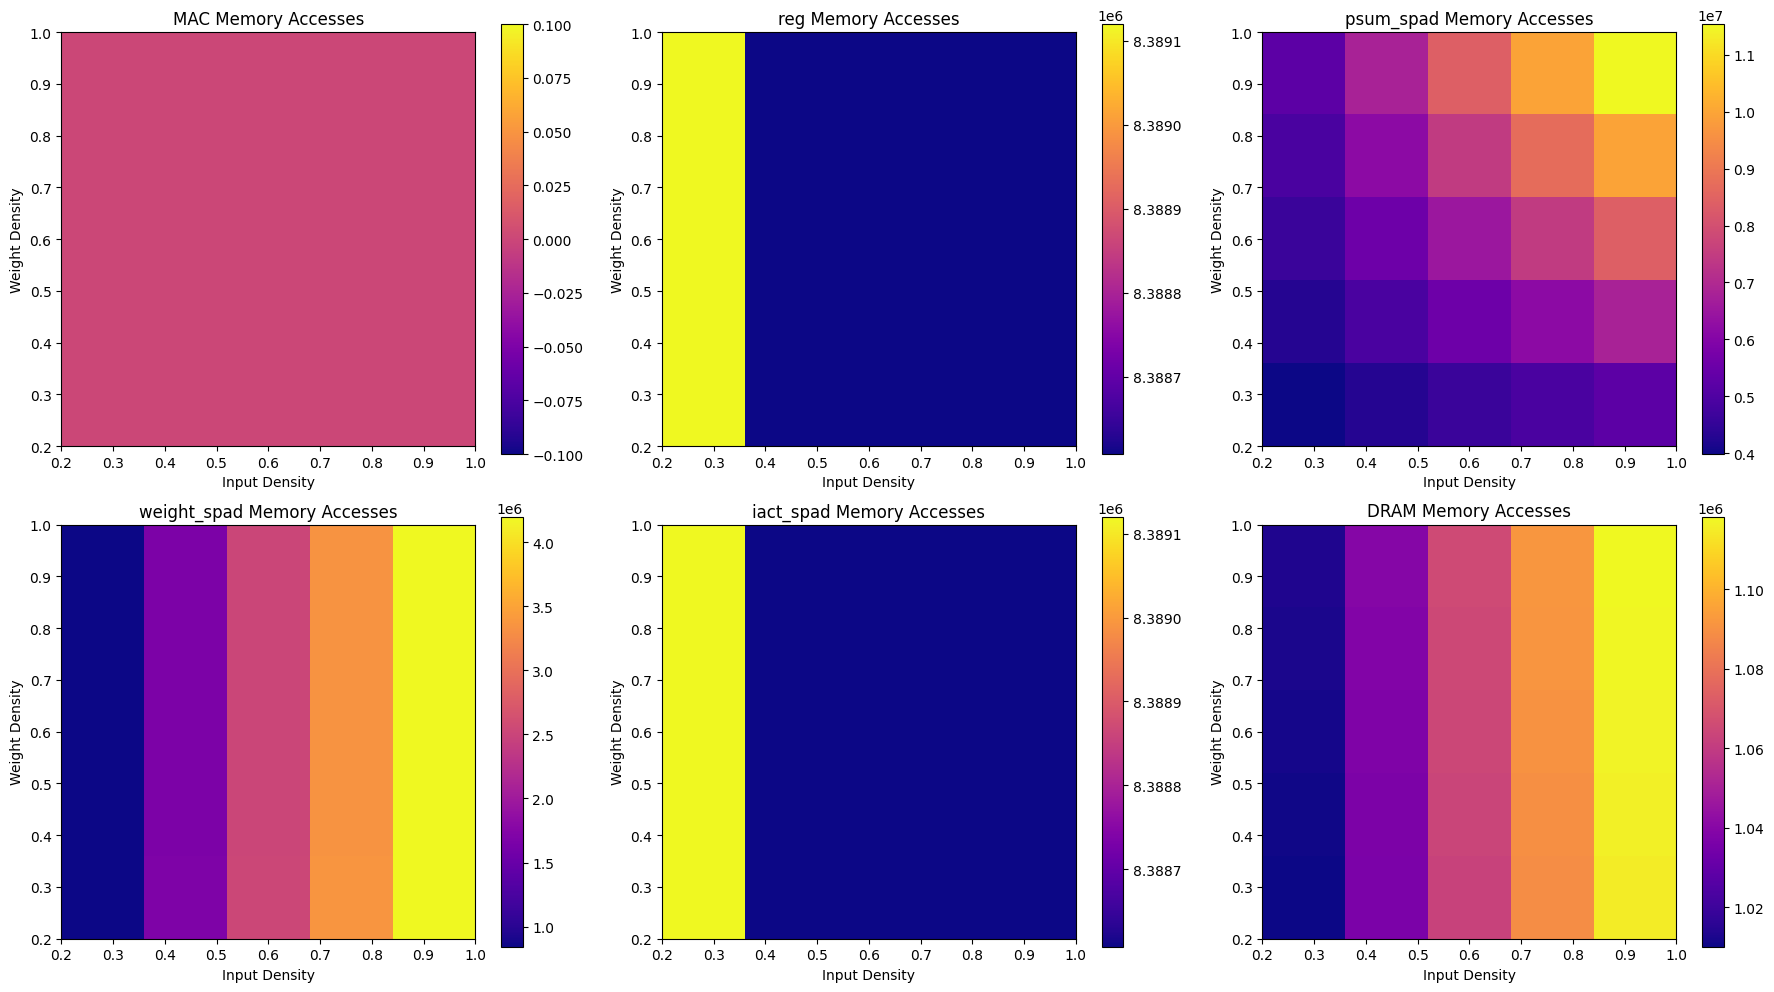

In [55]:
# Plot memory accesses
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(memory_access_breakdown[comp], origin='lower', cmap='plasma', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Memory Accesses')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
fig.tight_layout()
fig.savefig("figures/memory_access_heatmaps.png")
plt.show()
plt.close(fig)

In [51]:
fixed_w_idx = -1  
fixed_i_idx = -1 

def plot_line(y_data, ylabel, title, filename):
    x = density_vals
    fig, ax = plt.subplots(figsize=(8, 5))
    for label, y in y_data.items():
        ax.plot(x, y, marker='o', label=label)
    ax.set_xlabel("Density")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    fig.tight_layout()
    plt.show()
    # fig.savefig(f"figures/{filename}")
    # plt.close(fig)

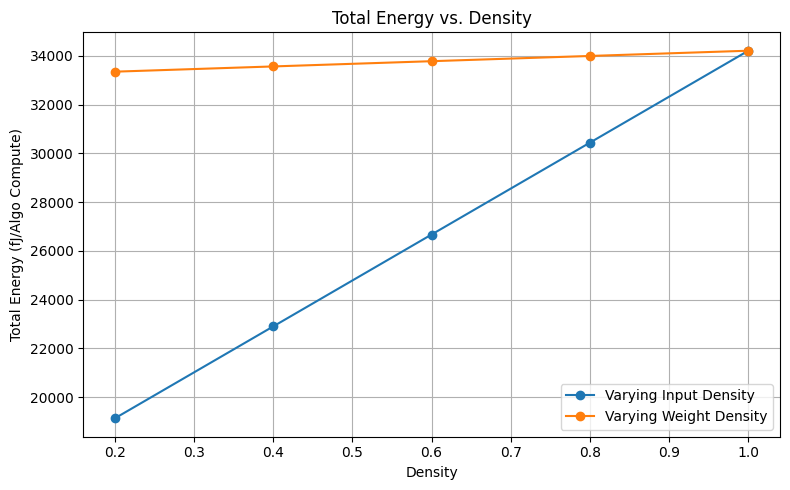

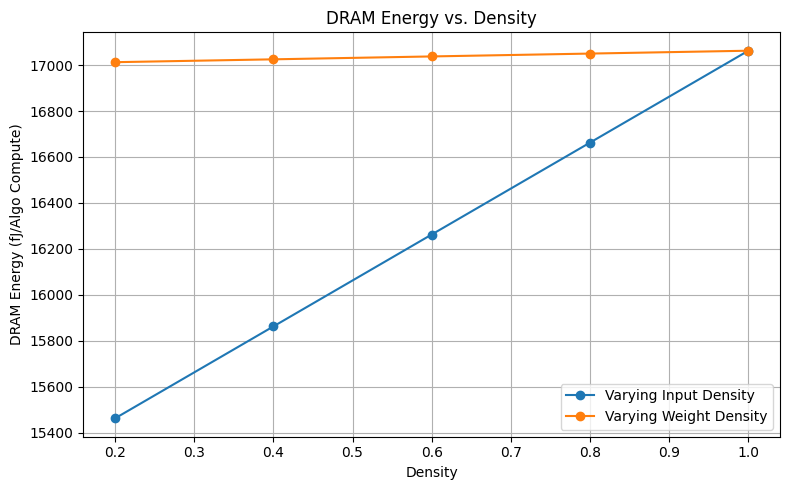

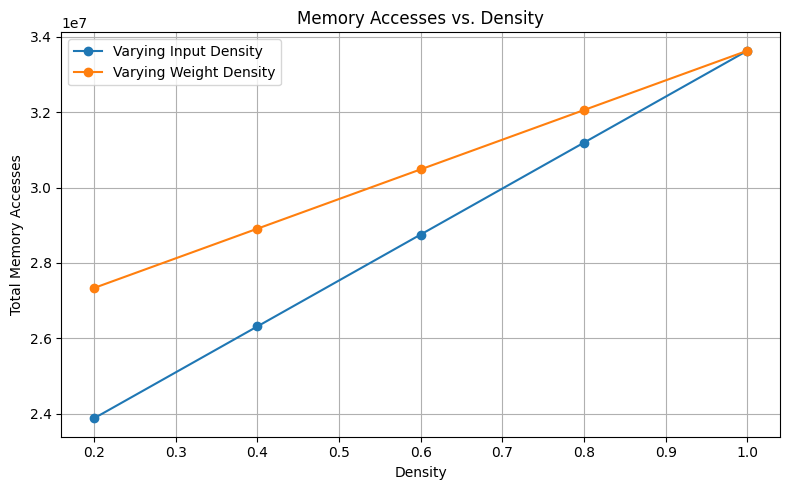

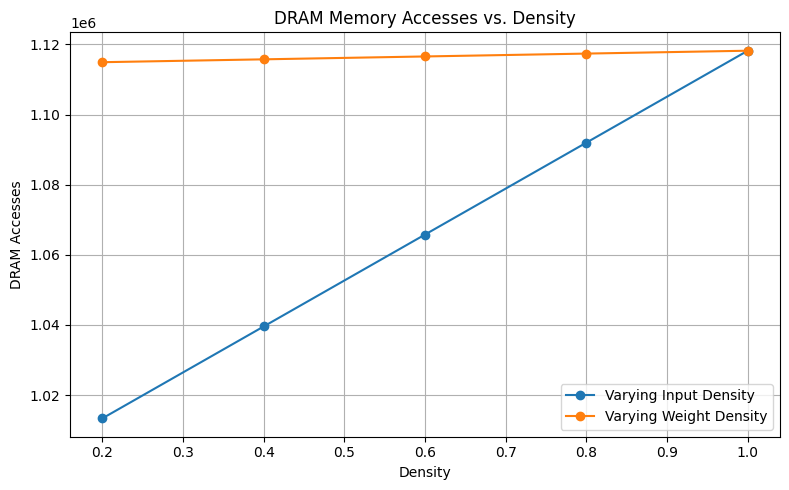

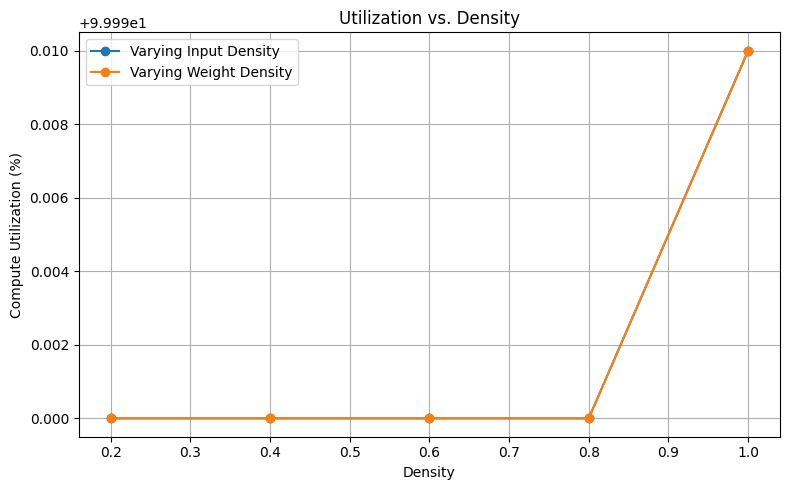

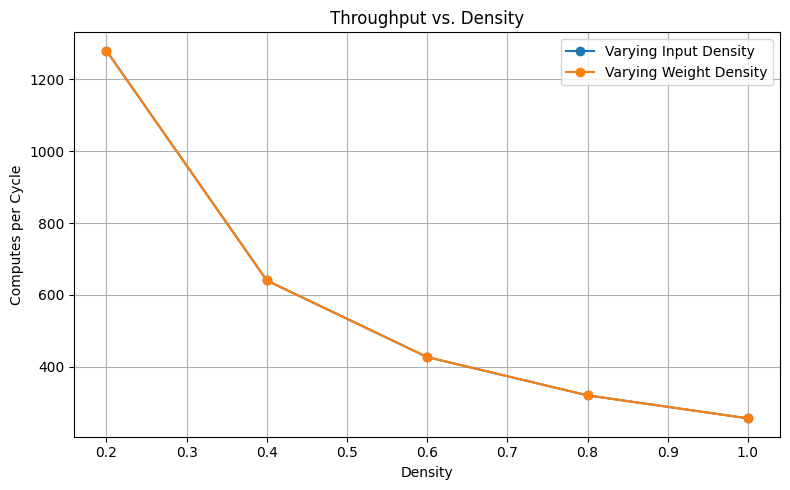

In [56]:
plot_line(
    {"Varying Input Density": np.sum([energy_breakdown[c][fixed_w_idx, :] for c in components], axis=0),
     "Varying Weight Density": np.sum([energy_breakdown[c][:, fixed_i_idx] for c in components], axis=0)},
    "Total Energy (fJ/Algo Compute)",
    "Total Energy vs. Density",
    "total_energy_line.png"
)

plot_line(
    {"Varying Input Density": energy_breakdown["DRAM"][fixed_w_idx, :],
     "Varying Weight Density": energy_breakdown["DRAM"][:, fixed_i_idx]},
    "DRAM Energy (fJ/Algo Compute)",
    "DRAM Energy vs. Density",
    "dram_energy_line.png"
)

plot_line(
    {"Varying Input Density": np.sum([memory_access_breakdown[c][fixed_w_idx, :] for c in components], axis=0),
     "Varying Weight Density": np.sum([memory_access_breakdown[c][:, fixed_i_idx] for c in components], axis=0)},
    "Total Memory Accesses",
    "Memory Accesses vs. Density",
    "total_memory_line.png"
)

plot_line(
    {"Varying Input Density": memory_access_breakdown["DRAM"][fixed_w_idx, :],
     "Varying Weight Density": memory_access_breakdown["DRAM"][:, fixed_i_idx]},
    "DRAM Accesses",
    "DRAM Memory Accesses vs. Density",
    "dram_memory_line.png"
)

plot_line(
    {"Varying Input Density": compute_utilization[fixed_w_idx, :],
     "Varying Weight Density": compute_utilization[:, fixed_i_idx]},
    "Compute Utilization (%)",
    "Utilization vs. Density",
    "utilization_line.png"
)

plot_line(
    {"Varying Input Density": computes_per_cycle[fixed_w_idx, :],
     "Varying Weight Density": computes_per_cycle[:, fixed_i_idx]},
    "Computes per Cycle",
    "Throughput vs. Density",
    "computes_per_cycle_line.png"
)